# CNN REVIEW

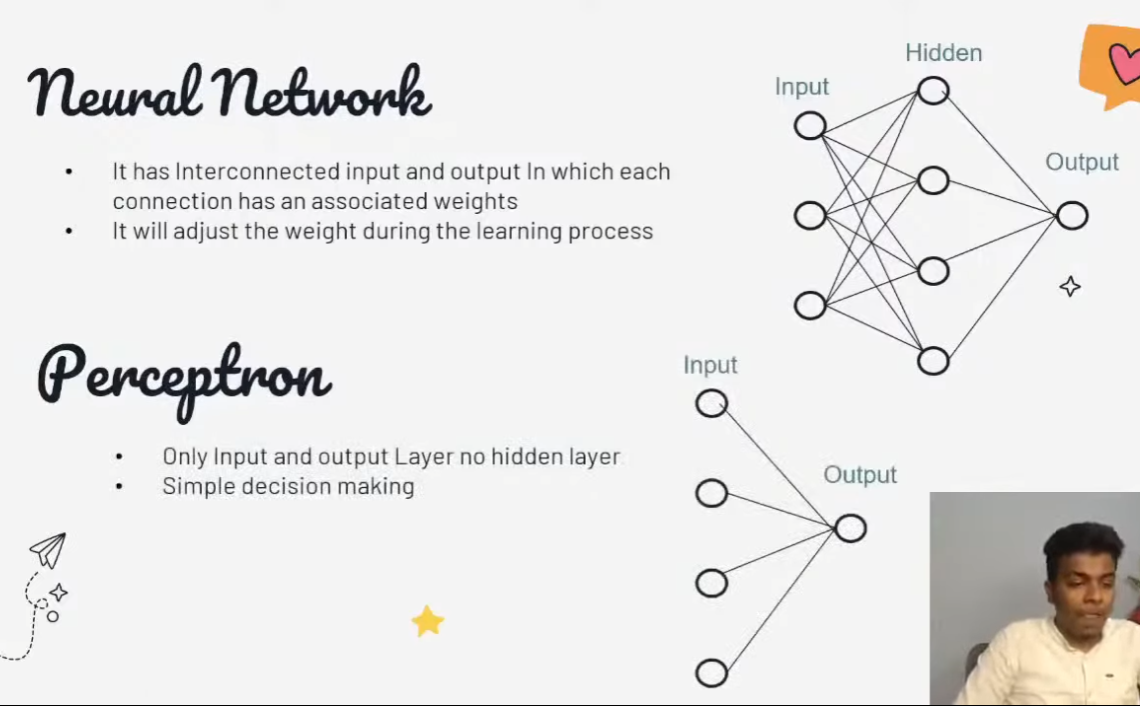

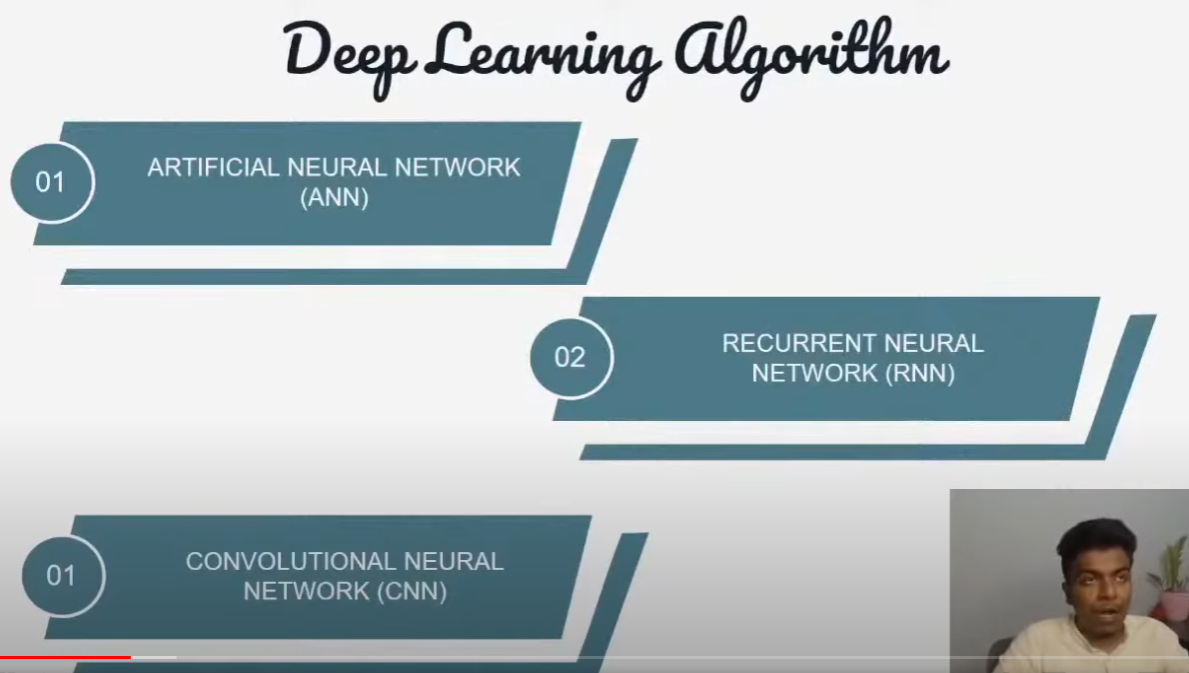

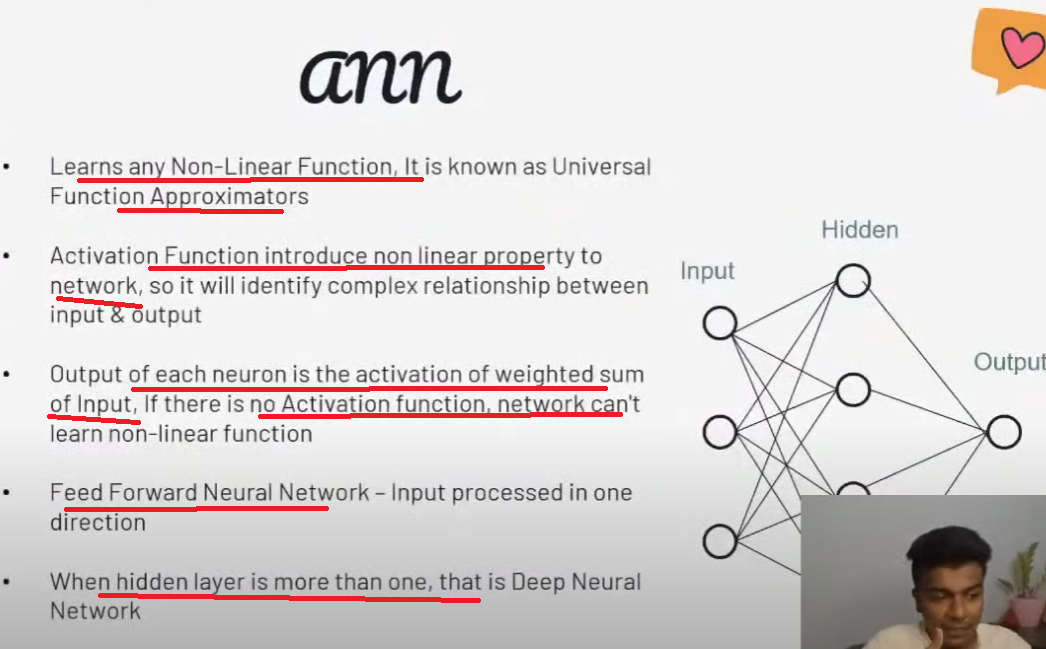

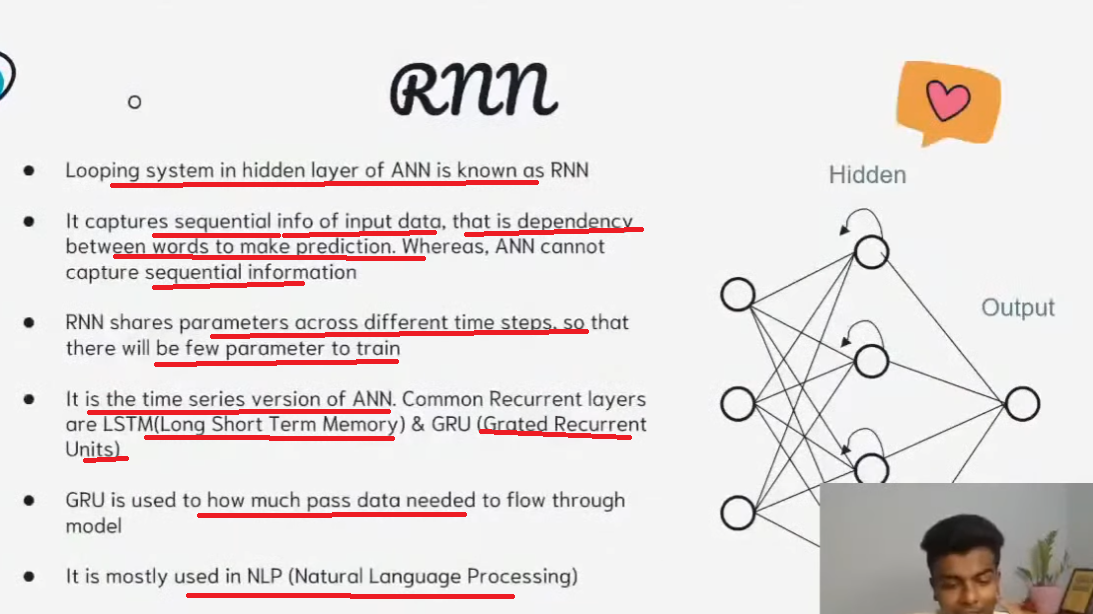

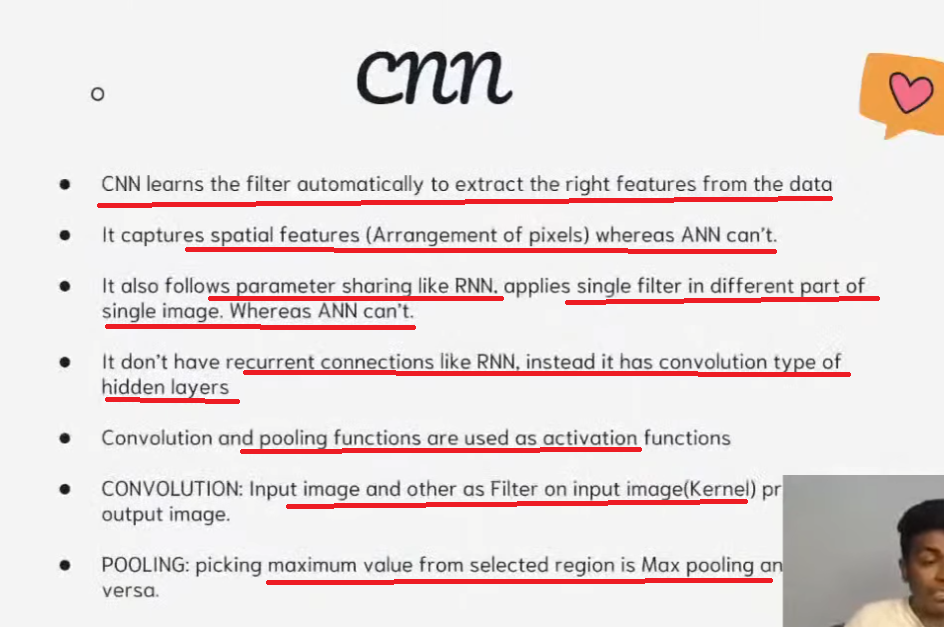

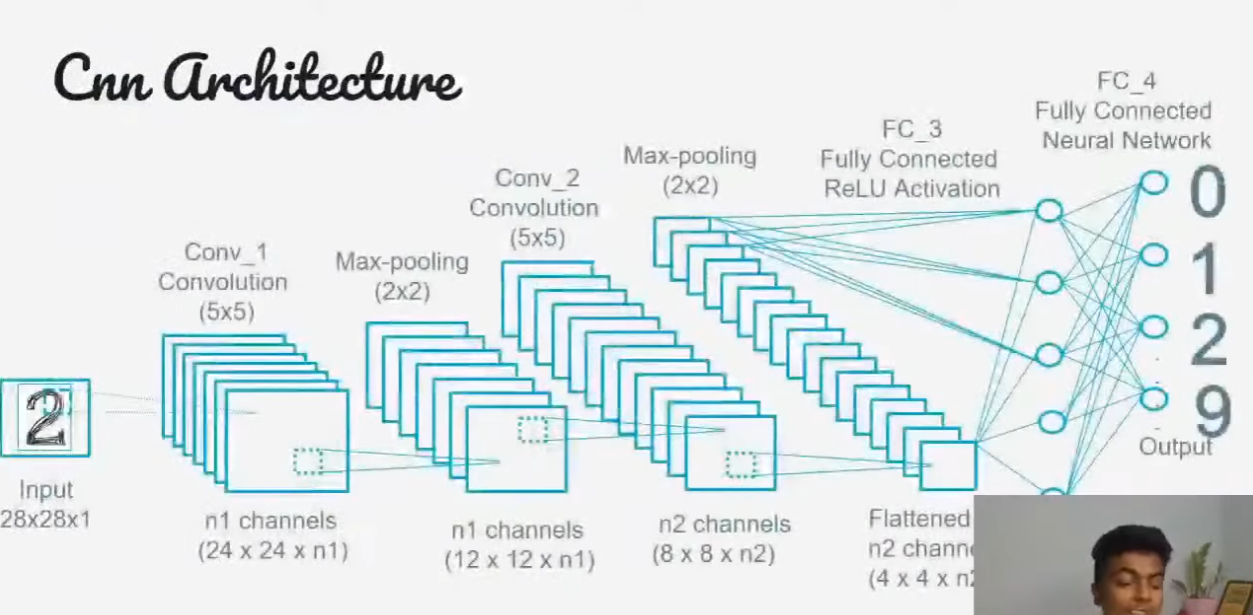

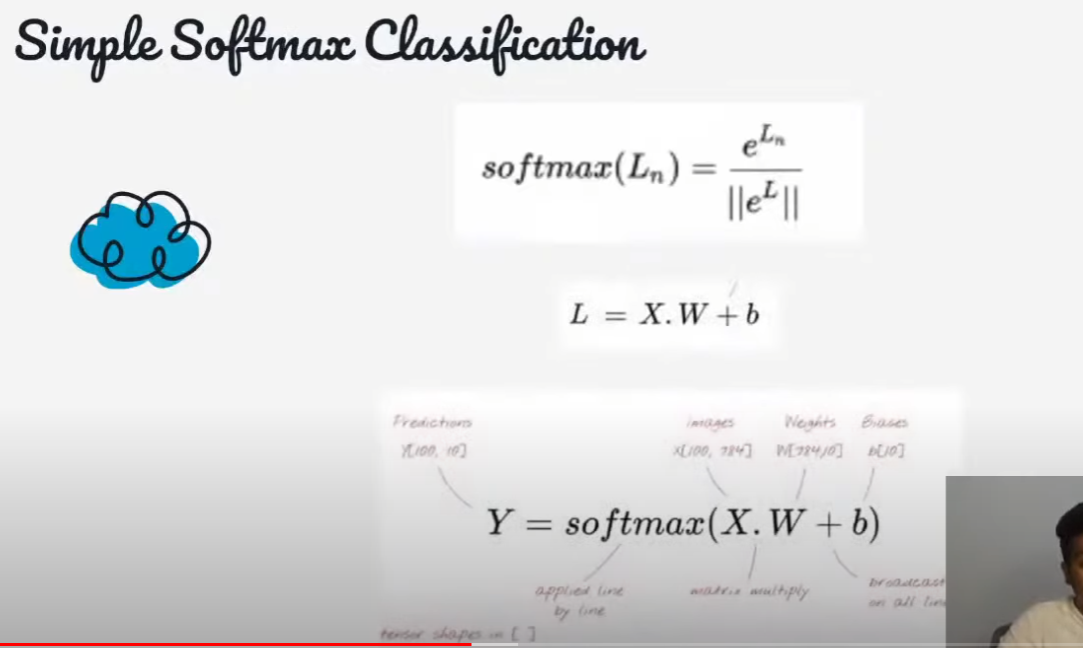

* flattening of a 2D image into a 1D flattened array

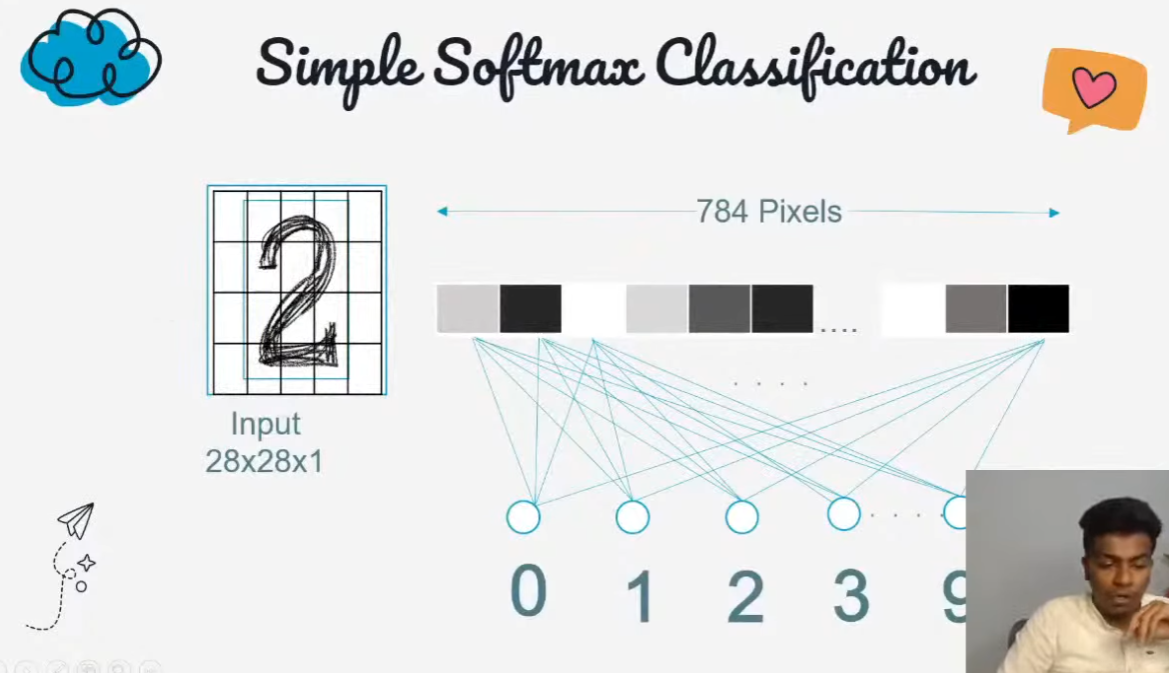

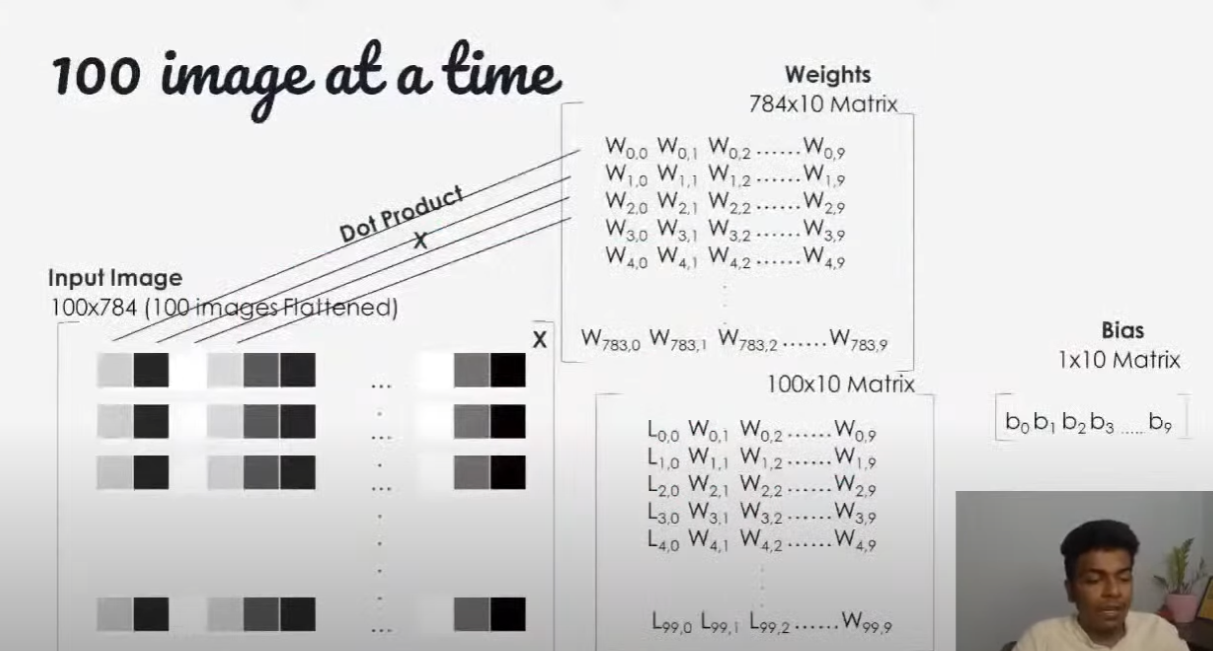

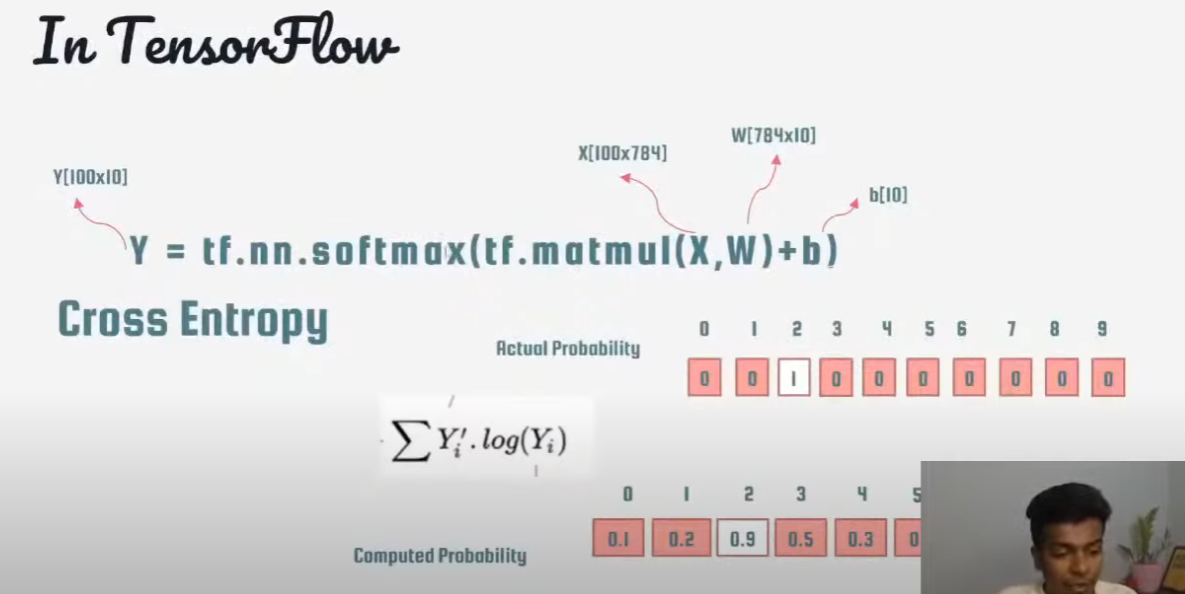

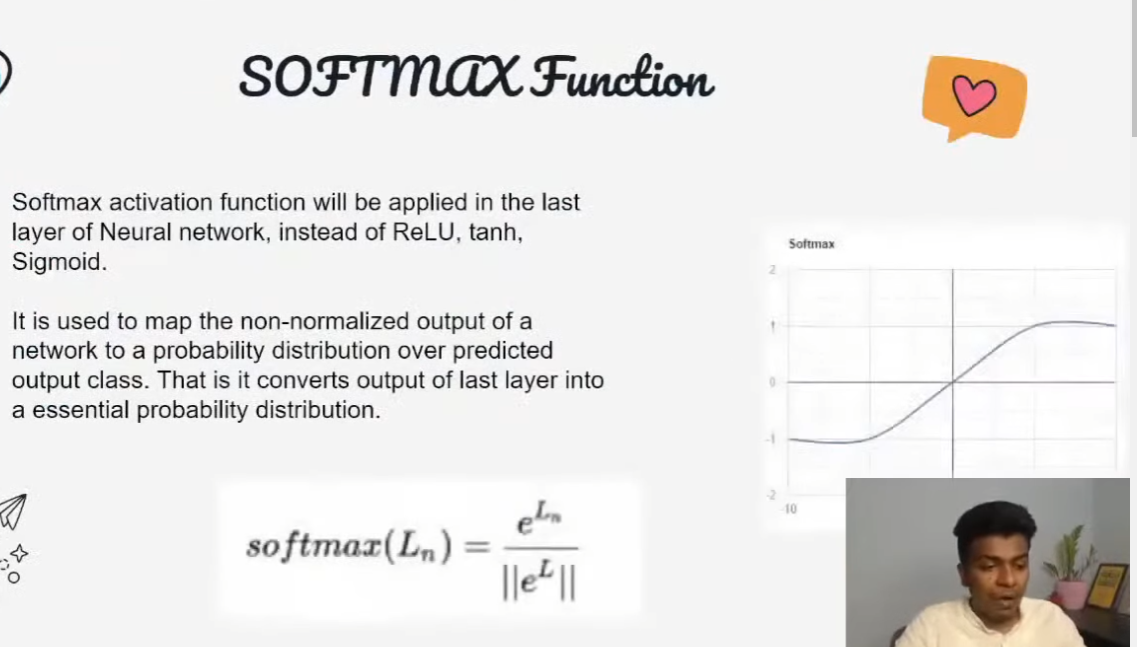

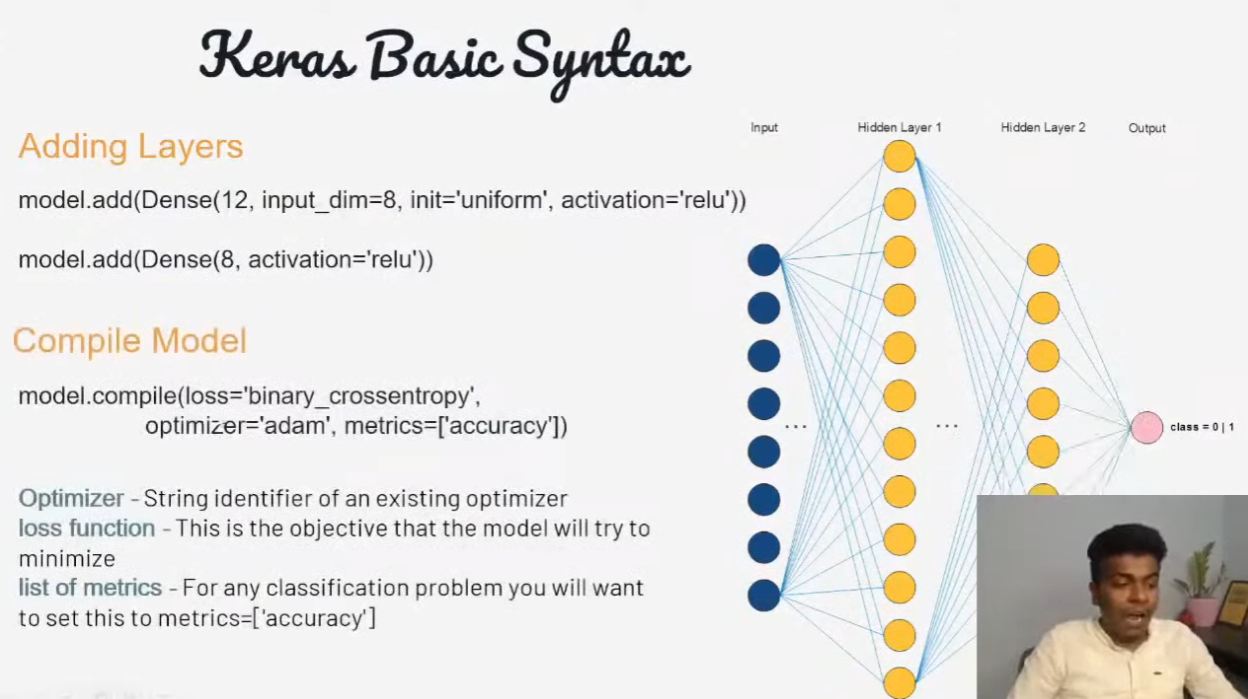

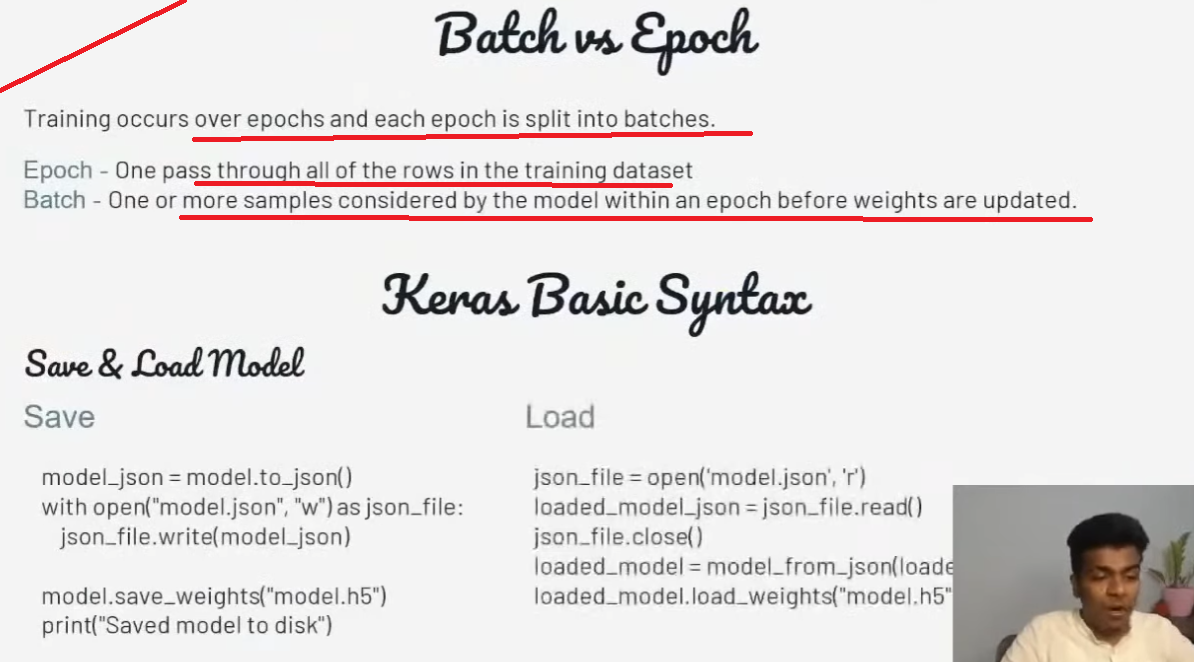

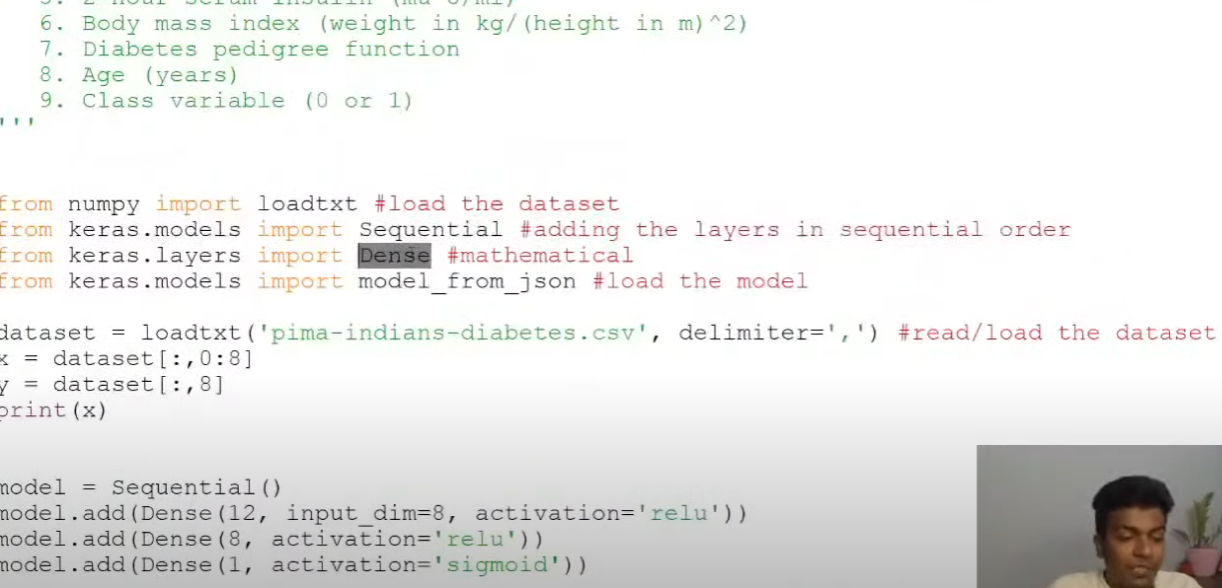

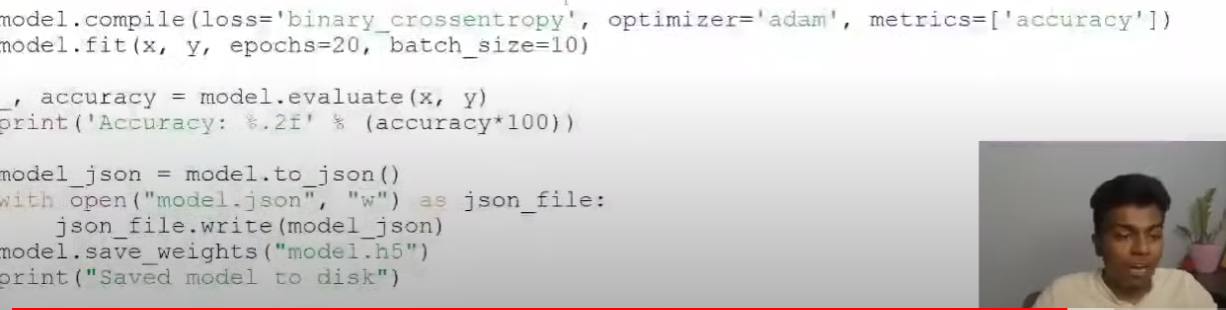

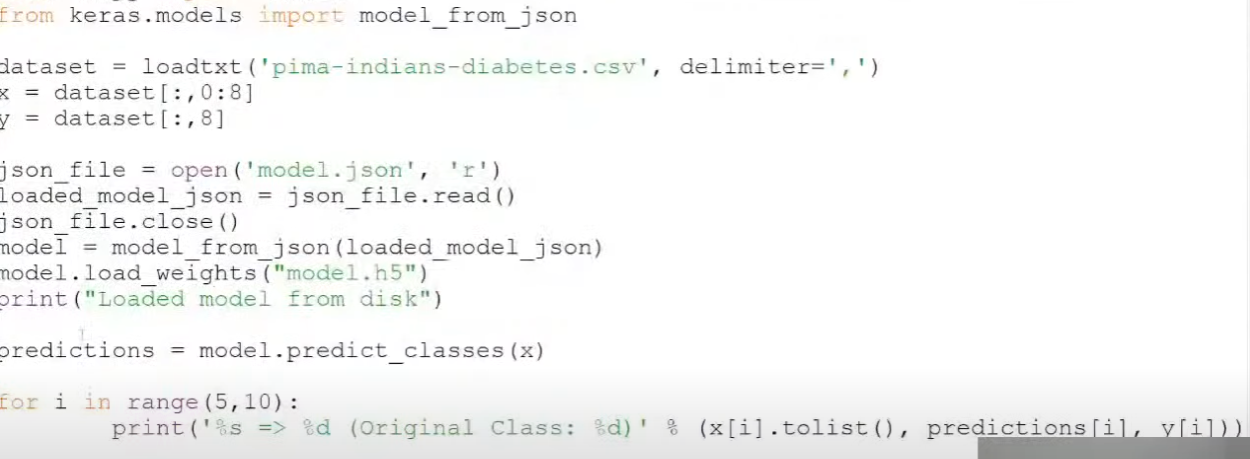

In [1]:
!pip install --user tensorflow 

In [2]:
!pip --version

pip 22.2.2 from C:\Users\rivil\anaconda3\lib\site-packages\pip (python 3.9)



In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rivil\appdata\roaming\python\python39\site-packages
Requires: tensorflow-intel
Required-by: 


In [5]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rivil\appdata\roaming\python\python39\site-packages
Requires: tensorflow-intel
Required-by: 


In [6]:
!pip3 install --user tensorflow 

In [7]:
from numpy import loadtxt   # load dataset

import tensorflow
from tensorflow.python import keras
from keras.models import Sequential   # add the layers in sequential order
from keras.layers import Dense       
from keras.models import model_from_json   # load th emodel

In [11]:
# segregate datasets
dataset = loadtxt("D:\\lh_data\\ineuron\\pima-indians-diabetes.csv", delimiter = ",")
x=dataset[:,0:8]
y=dataset[:,8]
print(x)

# designing neural network
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

# compilation
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
# training
model.fit(x,y, epochs=20, batch_size=10)

_,accuracy = model.evaluate(x,y)
print("Accuracy: %.2f" % (accuracy*100))

model_json = model.to_json()
with open("model_day10.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model_day10.h5")
print("Saved model to disk....")

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Epoch 1/20
77/77 [==============================] - 1s 2ms/step - loss: 6.3328 - accuracy: 0.5664
Epoch 2/20
77/77 [==============================] - 0s 2ms/step - loss: 1.1789 - accuracy: 0.5430
Epoch 3/20
77/77 [==============================] - 0s 2ms/step - loss: 0.9529 - accuracy: 0.5807
Epoch 4/20
77/77 [==============================] - 0s 2ms/step - loss: 0.8744 - accuracy: 0.5872
Epoch 5/20
77/77 [==============================] - 0s 2ms/step - loss: 0.7976 - accuracy: 0.6133
Epoch 6/20
77/77 [==============================] - 0s 2ms/step - loss: 0.7770 - accuracy: 0.6367
Epoch 7/20
77/77 [==============================] - 0s 2ms/step - loss: 0.75

In [15]:
from keras.models import model_from_json
from numpy import loadtxt
import numpy as np

# segregate datasets
dataset = loadtxt("D:\\lh_data\\ineuron\\pima-indians-diabetes.csv", delimiter = ",")
x=dataset[:,0:8]
y=dataset[:,8]

json_file = open("model_day10.json","r")
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
model.load_weights("model_day10.h5")
print("model loaded from disk")

predictions = model.predict(x)
classes = np.argmax(predictions, axis=1)

# testing on 5 instances
for i in range(5,10):
    print("%s --> %d (Original Class: %d)" %(x[i].tolist(), classes[i], y[i]))

model loaded from disk
24/24 [==============================] - 0s 1ms/step
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] --> 0 (Original Class: 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] --> 0 (Original Class: 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] --> 0 (Original Class: 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] --> 0 (Original Class: 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] --> 0 (Original Class: 1)
